In [11]:
import os
import sys 
import pandas as pd 
from tqdm.auto import tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

# Read Data

In [10]:
def iterate_data_files(from_dtm, to_dtm):
    from_dtm, to_dtm = map(str, [from_dtm, to_dtm])
    read_root = os.path.join('../res/', 'read')

    for fname in os.listdir(read_root):
        if len(fname) != len('2018100100_2018100103'):
            continue 
        if from_dtm !='None' and from_dtm>fname:
            continue
        if to_dtm!='None' and fname>to_dtm:
            continue
        path = os.path.join(read_root, fname)
        yield path, fname

In [22]:
data = []
files = sorted([path for path, _ in iterate_data_files('2018100100', '2019022200')])

In [23]:
for path in tqdm(files, mininterval=1):
    for line in open(path):
        tokens = line.strip().split()
        read_datetime = path.split('/')[-1].split('_')[0]
        user_id = tokens[0]
        reads = tokens[1:]
        for item in reads:
            data.append([read_datetime, user_id, item])

100%|██████████| 3456/3456 [00:32<00:00, 106.19it/s]


In [24]:
read_df = pd.DataFrame(data)
read_df.columns = ['date', 'user_id', 'article_id']
read_df.head()

,date,user_id,article_id
0,2018100100,#e208be4ffea19b1ceb5cea2e3c4dc32c,@kty0613_91
1,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@miamiyoung_31
2,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@banksalad_49
3,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@rlfrjsdn_95
4,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@readme999_140


In [12]:
read_df.tail()

,date,user_id,article_id
20977808,2019022123,#8478e0e3e6ff7e7320dd1508abd8d227,@evesy_117
20977809,2019022123,#8478e0e3e6ff7e7320dd1508abd8d227,@myseol_2
20977810,2019022123,#1dc1914c68477e653035922bd239fedb,@the8work_78
20977811,2019022123,#1dc1914c68477e653035922bd239fedb,@the8work_80
20977812,2019022123,#1dc1914c68477e653035922bd239fedb,@the8work_81


In [30]:
read_df.groupby('user_id').size().describe()

count    296520.000000
mean         70.746705
std         377.173485
min           1.000000
25%           3.000000
50%          10.000000
75%          39.000000
max       83688.000000
dtype: float64

## User Read Count 

In [23]:
user_read_count_df = read_df.groupby('user_id').size().reset_index(name='count')
user_read_count_df.head()

,user_id,count
0,#00001ba6ca8d87d2fc34d626ba9cfe6f,3
1,#0000d1188f75d0b0ea7a8e23a2b760e5,1
2,#0000e87158c1426d6ffb72cebac6cb64,2
3,#0000eea6d339abfd02ed590bc451fc63,1
4,#0000fdba8f35c76eacab74c5c6bc7f1a,5


<Figure size 1008x432 with 0 Axes>

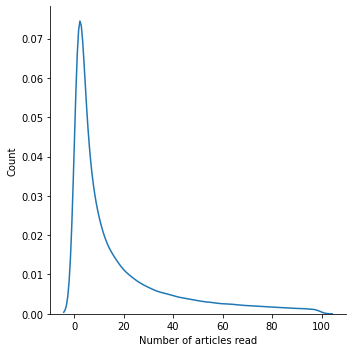

In [26]:
plt.figure(figsize = (14, 6))

sns.displot(data = user_read_count_df.loc[user_read_count_df['count']<100]['count'],
            kind = 'kde'
           )
plt.xlabel('Number of articles read')
plt.ylabel('Count')
plt.show()

## Popular Article Id

In [27]:
popular_article_df = read_df.groupby('article_id').size().sort_values(ascending=False).reset_index(name='count')
popular_article_df.head()

,article_id,count
0,@brunch_141,96981
1,@brunch_145,30711
2,@tenbody_1305,25411
3,@intlovesong_28,21702
4,@hyehyodam_19,20506


In [28]:
popular_article_df.describe()

,count
count,495940.000000
mean,42.299095
std,283.270460
min,1.000000
25%,3.000000
50%,7.000000
75%,24.000000
max,96981.000000


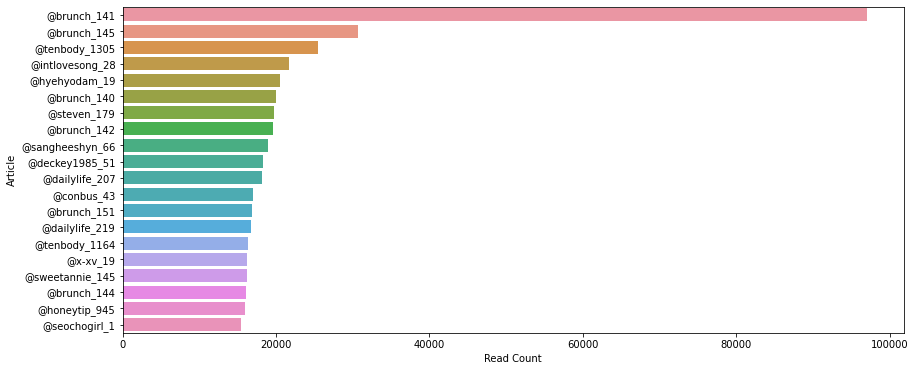

In [31]:
plt.figure(figsize = (14, 6))

sns.barplot(data = popular_article_df[0:20],
            x = 'count',
            y = 'article_id'
           )
plt.xlabel('Read Count')
plt.ylabel('Article')
plt.show()

# MetaData

작성된 글의 메타데이터 정보

In [35]:
meta_df = pd.read_json('../res/metadata.json', lines=True)
meta_df.head()

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81
2,0,@hannahajink,무엇을 위해,[],https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34


In [40]:
print(f'data shape: {meta_df.shape}')
print(f'unique id count: {meta_df["id"].nunique()}')
print(f'unique user id count: {meta_df["user_id"].nunique()}')
print(f'unique magazine id count: {meta_df["magazine_id"].nunique()}')

data shape: (643104, 9)
unique id count: 643104
unique user id count: 19065
unique magazine id count: 28028


In [41]:
meta_df['keyword_num'] = meta_df['keyword_list'].map(lambda x: len(x))

In [42]:
(meta_df
 .query('keyword_num>0')
 .shape)

(573039, 10)

In [45]:
meta_df['keyword_num'].value_counts().sort_index()

0     70065
1      6078
2     57994
3    506637
4      2325
5         5
Name: keyword_num, dtype: int64

전체 글 중 80%가 키워드를 가지고 있고 있음.

# User Data

가입한 사용자의 정보

In [56]:
user_df = pd.read_json('../res/users.json', lines=True)
user_df.head()

,keyword_list,following_list,id
0,[],"[@perytail, @brunch]",#901985d8bc4c481805c4a4f911814c4a
1,[],"[@holidaymemories, @wadiz, @sciforus, @dailydu...",#1fd89e9dcfa64b45020d9eaca54e0eed
2,[],"[@commerceguy, @sunsutu, @kakao-it, @joohoonja...",#1d94baaea71a831e1f33e1c6bd126ed5
3,[],"[@amberjeon48, @forsy20, @nemotokki, @hawann, ...",#04641c01892b12dc018b1410e4928c0d
4,[],"[@dwcha7342, @iammento, @kakao-it, @dkam, @ant...",#65bcaff862aadff877e461f54187ab62


In [57]:
print(f'Data Shape: {user_df.shape}')
print(f'Unique Id Count: {user_df["id"].nunique()}')

Data Shape: (310758, 3)
Unique Id Count: 310758


In [58]:
user_df['following_list_len'] = user_df['following_list'].map(lambda x: len(x))
user_df['following_list_len'].describe()

count    310758.000000
mean          8.420955
std          30.286427
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3528.000000
Name: following_list_len, dtype: float64

In [59]:
(user_df
 .query('following_list_len==0')
 .shape
)

(7268, 4)

<Figure size 1008x432 with 0 Axes>

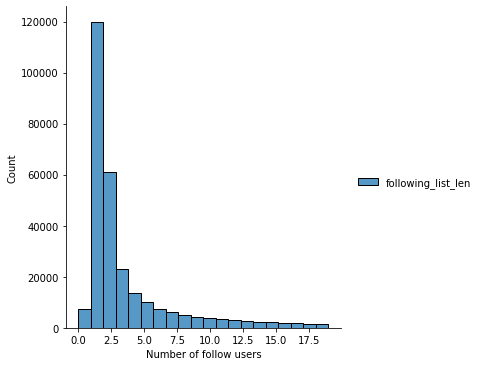

In [61]:
plt.figure(figsize = (14, 6))

(user_df
 .query('following_list_len < 20')
 .filter(['following_list_len'])
 .pipe((sns.displot, 'data'),
       bins =20
      )
)
plt.xlabel('Number of follow users')
plt.ylabel('Count')
plt.show()

In [62]:
user_df['keyword_list_len'] = user_df['keyword_list'].map(lambda x: len(x))

In [66]:
(user_df
 .query('keyword_list_len!=0')
 .filter(['keyword_list_len'])
 .describe()
)

,keyword_list_len
count,11544.000000
mean,40.855249
std,196.652621
min,1.000000
25%,4.000000
50%,11.000000
75%,30.000000
max,8265.000000


- 키워드를 리스트를 가진 작가의 수는 11544명, 앞서 메타데이터 정보에서 총 작가 수가 19065명인 것을 감안하면 60%의 작가는 검색 키워드를 가지고 있음.
- 앞서 80%의 글에서 키워드를 가지고 있는데 이를 통해 주요 키워드가 없는 20%의 글에서는 검색 키워드를 활용될 수도 있을 것으로 예상됨.

# Magazine

In [69]:
magazine_df = pd.read_json('../res/magazine.json', lines=True)
magazine_df.head()

,magazine_tag_list,id
0,"[브런치북, 육아일기, 대화법, 들려주고픈이야기]",38842
1,"[tea, food]",11540
2,[food],11541
3,"[브런치북, 일상, 시, 사람]",11546
4,"[감성에세이, 노래, 음악에세이]",11544


In [70]:
print(magazine_df.shape)

(27967, 2)


In [71]:
magazine_df['magazine_tag_list_len'] = magazine_df['magazine_tag_list'].map(lambda x: len(x))
magazine_df['magazine_tag_list_len'].describe()

count    27967.000000
mean         2.856366
std          0.682429
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          6.000000
Name: magazine_tag_list_len, dtype: float64

# 예측 대상 사용자 정보

In [73]:
dev_user_df = pd.read_csv('../res/predict/dev.users', header=None)
dev_user_df.columns=['id']
dev_user_df.head()

,id
0,#d6866a498157771069fdf15361cb012b
1,#f963fb8c5d9d14d503fc4e80bd8617b4
2,#87a6479c91e4276374378f1d28eb307c
3,#677e984e245b344f61dc5d3cc1f352c8
4,#519f45eb14e4807e8714fb7e835463eb


In [74]:
test_user_df = pd.read_csv('../res/predict/test.users', header=None)
test_user_df.columns=['id']
test_user_df.head()

,id
0,#7ee14df8642a7925b1465ff5c89efe5b
1,#8420b9385b282028eebf1ad6b4a221c0
2,#c9b31d8b64357f5854b1ba55b32eb6d3
3,#9bb1e13b5481fa3737af20870b25c723
4,#37d5f99a7f12c9ba90c4e2ac92e54ab6


In [76]:
print(dev_user_df.shape)
print(test_user_df.shape)

(3000, 1)
(5000, 1)


In [87]:
test_user = test_user_df['id'].values

test_user_read_info = (user_read_count_df
                       .query('user_id in @test_user')
                      )

In [88]:
test_user_read_info.describe()

,count
count,4496.000000
mean,540.616548
std,1255.179434
min,1.000000
25%,50.000000
50%,182.000000
75%,549.000000
max,40914.000000


- 전체 사용자의 평균 글 조회수는 70회정도인데 비해 테스트 유저의 경우 7배 이상 높다.
- 글 조회 기록이 없는 사용자가 504명으로 약 10%를 차지합니다.

In [92]:
test_user_follow_info = (user_df
                         .query('id in @test_user')
                        )

In [95]:
test_user_follow_info['following_list_len'].describe()

count    4988.000000
mean       26.620088
std        64.982802
min         0.000000
25%         2.000000
50%         8.000000
75%        24.000000
max      1293.000000
Name: following_list_len, dtype: float64

- 테스트 유저의 평균 구독 수가 26으로 전체 평균 구독 수보다 3배 이상 높기 때문에 구독 정보를 이용한 추천이 좋은 결과를 보여줄 것으로 기대할 수 있음.